# Statistical Approach to for predicting IMDB

1. [Introduction](#introduction)<br>
    1.1 [Background](#background)<br>
    1.2 [Data Description](#datadescription)<br>
    1.3 [Problem Statement](#problemstatement)<br>
2. [Data Exploration](#dataexploration)<br>
    2.1 [Data Loading](#dataloading)<br>
    2.2 [Data Profile](#dataprofile)<br>
    2.3 [Data Cleaning](#datacleaning)<br>
3. [Regression Model Building](#rmb)<br>
    3.1 [Splitting the Dataset](#std)<br>
    3.2 [Scaling to avoid Euclidean Distance problem](#s)<br>
    3.3 [Feature Elimination](#fe)<br>
    3.4 [Simple Linear Regression](#slr)<br>
    3.5 [Support Vector Machines with Linear, Polynomial and RBF Kernels](#svmr)<br>
    3.6 [Ensemble Models](#em)<br>
     3.6.1 [Gradient Boosting with Hyperparameter Tuning](#gbr)<br>
     3.6.2 [Random Forest with Hyperparameter Tuning](#rbr)<br>
    3.7 [XGBoost with Hyperparameter Tuning](#xgbr)<br>
    3.8 [Interpreting Results of a Regresison Model](#irr)<br>
4. [Building a Classificaiton Model](#bc)<br>
    4.1 [Logistic Regression](#lr)<br>
    4.2 [Support Vector machines with Linear, Polynomial adn RBF Kernels](#svmc)<br>
    4.3 [Ensemble Models](#emc)<br>
     4.3.1 [Random Forest with Hyperparameter Tuning](#rfc)<br>
     4.3.2 [Gradient Boosting with Hyperparameter Tuning](#gbc)<br>
    4.4 [XGBoost with Hyperparameter Tuning](#xgbc)<br>
    4.5 [Interpreting Results of Classification Model](#ircm)
5. [Conclusion](#conclusion)<br>

<a id='introduction'></a>

# 1 Introduction

<a id='bakground'></a>

## 1.1 Background

A commercial success movie not only entertains audience, but also enables film companies to gain tremendous profit. A lot of factors such as good directors, experienced actors are considerable for creating good movies. However, famous directors and actors can always bring an expected box-office income but cannot guarantee a highly rated imdb score.

<a id='datadescription'></a>

## 1.2 Data Description

The dataset is from Kaggle website. It contains 28 variables for 5043 movies, spanning across 100 years in 66 countries. There are 2399 unique director names, and thousands of actors/actresses. “imdb_score” is the response variable while the other 27 variables are possible predictors.

|Variable Name |	Description|
| --- | --- |
|movie_title	 | Title of the Movie|
|duration	| Duration in minutes|
|director_name	| Name of the Director of the Movie|
|director_facebook_likes |	Number of likes of the Director on his Facebook Page|
|actor_1_name |	Primary actor starring in the movie|
|actor_1_facebook_likes |	Number of likes of the Actor_1 on his/her Facebook Page|
|actor_2_name |	Other actor starring in the movie|
|actor_2_facebook_likes	| Number of likes of the Actor_2 on his/her Facebook Page|
|actor_3_name |	Other actor starring in the movie|
|actor_3_facebook_likes |	Number of likes of the Actor_3 on his/her Facebook Page|
|num_user_for_reviews |	Number of users who gave a review|
|num_critic_for_reviews |	Number of critical reviews on imdb|
|num_voted_users | 	Number of people who voted for the movie|
|cast_total_facebook_likes |	Total number of facebook likes of the entire cast of the movie|
|movie_facebook_likes |	Number of Facebook likes in the movie page|
|plot_keywords |	Keywords describing the movie plot|
|facenumber_in_poster |	Number of the actor who featured in the movie poster|
|color |	Film colorization. ‘Black and White’ or ‘Color’|
|genres |	Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’|
|title_year |	The year in which the movie is released (1916:2016)|
|language |	English, Arabic, Chinese, French, German, Danish, Italian, Japanese etc|
|country |	Country where the movie is produced|
|content_rating |	Content rating of the movie|
|aspect_ratio |	Aspect ratio the movie was made in|
|movie_imdb_link |	IMDB link of the movie|
|gross |	Gross earnings of the movie in Dollars|
|budget |	Budget of the movie in Dollars|
|imdb_score |	IMDB Score of the movie on IMDB|

<a id='problemstatement'></a>

## 1.3 Problem Statement

Based on the massive movie information, it would be interesting to understand what are the important factors that make a movie more successful than others. So, we would like to analyze what kind of movies are more successful, in other words, get higher IMDB score. 

In this notebook we are going to build two different kind of models, Regression and Classification. Under each kind of model we are going to start from a basic model to advanced model and also a description of why we choose advanced one. 

Under Regression we are goint to fit Regression line to our data and find the continous target variable imdb_score.

Under Classification we are  going to fit the Classification Model to our data and the Classify the imdb_score in to three categories. 

|imdb_score | Classify |
| --- | ---|
1-3 | Flop Movie
3-6 | Average Movie
6-10 | Hit Movie

<a id='dataexploration'></a>

# 2. Data Exploration

<a id='dataloading'></a>

## 2.1 Data Loading

In [1]:
#importing the libraries that we use
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

In [2]:
#importing the dataset
dataset = pd.read_csv('movie_metadata.csv')
dataset.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
dataset.shape

(5043, 28)

In [4]:
dataset.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

<a id='dataprofile'></a>

## 2.2 Data Profile

In [5]:
dataset.profile_report()

In [6]:
dataset.drop_duplicates(inplace = True)
dataset.shape

(4998, 28)

<a id='datacleaning'></a>

## 2.3 Data Cleaning

Data Cleaning is a most important part of building a model. Here we do the standard preprocessing steps of the Data cleaning to make sure our model is not feeded crap.

### 2.3.1 Missing Value Treatment

In [7]:
numerical_cols = [col for col in dataset.columns if dataset[col].dtype != 'object']
categorical_cols = [col for col in dataset.columns if dataset[col].dtype == 'object']

In [8]:
categorical_cols, numerical_cols

(['color',
  'director_name',
  'actor_2_name',
  'genres',
  'actor_1_name',
  'movie_title',
  'actor_3_name',
  'plot_keywords',
  'movie_imdb_link',
  'language',
  'country',
  'content_rating'],
 ['num_critic_for_reviews',
  'duration',
  'director_facebook_likes',
  'actor_3_facebook_likes',
  'actor_1_facebook_likes',
  'gross',
  'num_voted_users',
  'cast_total_facebook_likes',
  'facenumber_in_poster',
  'num_user_for_reviews',
  'budget',
  'title_year',
  'actor_2_facebook_likes',
  'imdb_score',
  'aspect_ratio',
  'movie_facebook_likes'])

In [9]:
dataset[numerical_cols].describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4949.000000,4983.000000,4895.000000,4975.000000,4991.000000,4.124000e+03,4.998000e+03,4998.000000,4985.000000,4977.000000,4.511000e+03,4891.000000,4985.000000,4998.000000,4671.000000,4998.000000
mean,139.890079,107.213325,688.679060,639.900905,6556.939892,4.832565e+07,8.347020e+04,9676.941176,1.368907,272.014667,3.974787e+07,2002.468820,1642.998796,6.441056,2.221417,7487.430172
std,121.477586,25.248775,2821.649616,1643.298282,15061.586700,6.796483e+07,1.380866e+05,18165.404578,2.014623,377.776210,2.069689e+08,12.475235,4030.925303,1.124107,1.391185,19290.726563
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,611.500000,5.304835e+06,8.560000e+03,1405.500000,0.000000,64.000000,6.000000e+06,1999.000000,280.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,369.000000,984.000000,2.544575e+07,3.426050e+04,3085.500000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,162.500000
75%,195.000000,118.000000,192.000000,635.000000,11000.000000,6.231942e+07,9.612075e+04,13740.500000,2.000000,324.000000,4.500000e+07,2011.000000,917.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [10]:
dataset[categorical_cols].describe()

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,4979,4895,4985,4998,4991,4998,4975,4846,4998,4986,4993,4697
unique,2,2398,3032,914,2097,4917,3521,4760,4919,47,65,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,Home,Ben Mendelsohn,based on novel,http://www.imdb.com/title/tt2638144/?ref_=fn_t...,English,USA,R
freq,4772,26,20,235,49,3,8,4,3,4662,3773,2098


In [11]:
dataset.isnull().sum()

color                         19
director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

In [12]:
dataset.color.unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [13]:
color_mode = dataset['color'].mode().iloc[0]
dataset.color.fillna(color_mode, inplace = True)
dataset.color.isnull().sum()

0

In [14]:
dataset.director_name.nunique(), dataset.director_name.isnull().sum()

(2398, 103)

In [15]:
dataset = dataset.dropna(axis = 0, subset = ['director_name'] )

In [16]:
dataset.num_critic_for_reviews.min(), dataset.num_critic_for_reviews.max(), dataset.num_critic_for_reviews.median()

(1.0, 813.0, 112.0)

In [17]:
num_critic_for_reviews_median = dataset['num_critic_for_reviews'].median()
dataset.num_critic_for_reviews.fillna(num_critic_for_reviews_median, inplace = True)
dataset.num_critic_for_reviews.isnull().sum()

0

In [18]:
dataset.duration.min(), dataset.duration.max(), dataset.duration.median()

(7.0, 330.0, 104.0)

In [19]:
duration_median = dataset.duration.median()
dataset.duration.fillna(duration_median, inplace = True)
dataset.duration.isnull().sum()

0

In [20]:
dataset.director_facebook_likes.min(), dataset.director_facebook_likes.max(), dataset.director_facebook_likes.median(),dataset.director_facebook_likes.mean()

(0.0, 23000.0, 49.0, 688.6790602655772)

In [21]:
director_facebook_likes_mean = dataset.director_facebook_likes.mean()
dataset.director_facebook_likes.fillna(director_facebook_likes_mean, inplace = True)
dataset.director_facebook_likes.isnull().sum()

0

In [22]:
dataset.actor_3_facebook_likes.min(), dataset.actor_3_facebook_likes.max(), dataset.actor_3_facebook_likes.median(),dataset.actor_3_facebook_likes.mean()

(0.0, 23000.0, 372.0, 646.1009230769231)

In [23]:
actor_3_facebook_likes_mean = dataset.actor_3_facebook_likes.mean()
dataset.actor_3_facebook_likes.fillna(actor_3_facebook_likes_mean, inplace = True)
dataset.actor_3_facebook_likes.isnull().sum()

0

In [24]:
dataset = dataset.dropna(axis = 0, subset = ['actor_2_name'])
dataset.actor_2_name.isnull().sum()

0

In [25]:
dataset.actor_1_facebook_likes.min(), dataset.actor_1_facebook_likes.max(), dataset.actor_1_facebook_likes.median(),dataset.actor_1_facebook_likes.mean()

(0.0, 640000.0, 991.0, 6670.408886158886)

In [26]:
actor_1_facebook_likes_mean = dataset.actor_1_facebook_likes.mean()
dataset.actor_1_facebook_likes.fillna(actor_1_facebook_likes_mean, inplace = True)
dataset.actor_1_facebook_likes.isnull().sum()

0

In [27]:
dataset.gross.describe()

count    4.115000e+03
mean     4.842949e+07
std      6.800274e+07
min      1.620000e+02
25%      5.354708e+06
50%      2.551750e+07
75%      6.242729e+07
max      7.605058e+08
Name: gross, dtype: float64

In [28]:
dataset.gross.isnull().sum()

769

In [29]:
dataset = dataset.dropna(axis = 0, subset = ['gross'])
dataset.gross.isnull().sum()

0

In [30]:
dataset.shape

(4115, 28)

In [31]:
dataset.isnull().sum()

color                          0
director_name                  0
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                   0
actor_1_facebook_likes         0
gross                          0
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   7
facenumber_in_poster           7
plot_keywords                 39
movie_imdb_link                0
num_user_for_reviews           1
language                       3
country                        0
content_rating                60
budget                       263
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                 102
movie_facebook_likes           0
dtype: int64

In [32]:
dataset = dataset.dropna(axis = 0, subset = ['budget'])
dataset.budget.isnull().sum()

0

In [33]:
dataset.isnull().sum()

color                         0
director_name                 0
num_critic_for_reviews        0
duration                      0
director_facebook_likes       0
actor_3_facebook_likes        0
actor_2_name                  0
actor_1_facebook_likes        0
gross                         0
genres                        0
actor_1_name                  0
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                  5
facenumber_in_poster          6
plot_keywords                30
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
content_rating               48
budget                        0
title_year                    0
actor_2_facebook_likes        0
imdb_score                    0
aspect_ratio                 72
movie_facebook_likes          0
dtype: int64

In [34]:
dataset.shape

(3852, 28)

In [35]:
dataset = dataset.dropna(axis = 0, subset = ['actor_3_name'])
dataset.actor_3_name.isnull().sum()

0

In [36]:
facenumber_in_poster_median = dataset.facenumber_in_poster.median()
dataset.facenumber_in_poster.fillna(facenumber_in_poster_median, inplace = True)
dataset.facenumber_in_poster.isnull().sum()

0

In [37]:
dataset.plot_keywords.unique()

array(['avatar|future|marine|native|paraplegic',
       'goddess|marriage ceremony|marriage proposal|pirate|singapore',
       'bomb|espionage|sequel|spy|terrorist', ...,
       'assassin|death|guitar|gun|mariachi',
       'written and directed by cast member',
       'actress name in title|crush|date|four word title|video camera'],
      dtype=object)

In [38]:
dataset.language.unique()

array(['English', 'Mandarin', 'Aboriginal', 'Spanish', 'French',
       'Filipino', 'Maya', 'Kazakh', 'Telugu', 'Cantonese', 'Japanese',
       'Aramaic', 'Italian', 'Dutch', 'Dari', 'German', 'Mongolian',
       'Thai', 'Bosnian', 'Korean', 'Hungarian', 'Hindi', nan,
       'Icelandic', 'Danish', 'Portuguese', 'Norwegian', 'Czech',
       'Russian', 'None', 'Zulu', 'Hebrew', 'Dzongkha', 'Arabic',
       'Vietnamese', 'Indonesian', 'Romanian', 'Persian', 'Swedish'],
      dtype=object)

In [39]:
dataset.language.value_counts()

English       3665
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Danish           3
Dutch            3
Thai             3
Persian          3
Indonesian       2
Aboriginal       2
Hebrew           2
Dari             2
Telugu           1
Kazakh           1
Dzongkha         1
Swedish          1
Czech            1
Romanian         1
Aramaic          1
Mongolian        1
None             1
Russian          1
Maya             1
Arabic           1
Bosnian          1
Vietnamese       1
Icelandic        1
Filipino         1
Hungarian        1
Zulu             1
Name: language, dtype: int64

In [40]:
language_mode = dataset.language.mode().iloc[0]
dataset.language.fillna(language_mode, inplace = True)
dataset.language.isnull().sum()

0

In [41]:
dataset = dataset.dropna(axis = 0, subset = ['plot_keywords'])
dataset.plot_keywords.isnull().sum()

0

In [42]:
dataset.content_rating.unique()

array(['PG-13', 'PG', 'G', 'R', 'Approved', 'NC-17', nan, 'X',
       'Not Rated', 'Unrated', 'M', 'GP', 'Passed'], dtype=object)

In [43]:
dataset.content_rating.fillna('Not Rated', inplace = True)

In [44]:
dataset.aspect_ratio.unique()

array([ 1.78,  2.35,  1.85,  2.  ,  2.2 ,  2.39,  2.24,  1.66,  1.5 ,
        1.77,  2.4 ,  1.37,   nan,  2.76,  1.33,  1.18,  2.55,  1.75,
       16.  ])

In [45]:
aspect_ratio_mode = dataset.aspect_ratio.mode().iloc[0]
dataset.aspect_ratio.fillna(aspect_ratio_mode, inplace = True)                                                    

In [46]:
dataset.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [47]:
dataset.reset_index(inplace = True, drop = True)

### 2.3.2 Profile Report after missing value treatment 

In [48]:
dataset.profile_report()

Dealing with Null Data amount we have lost 25% of the given data. Let's deal with converting the Data in to numericals to feed our model. 

### 2.3.3 Converting Categoricals to Numericals to feed our model

In [49]:
numerical_cols, categorical_cols

(['num_critic_for_reviews',
  'duration',
  'director_facebook_likes',
  'actor_3_facebook_likes',
  'actor_1_facebook_likes',
  'gross',
  'num_voted_users',
  'cast_total_facebook_likes',
  'facenumber_in_poster',
  'num_user_for_reviews',
  'budget',
  'title_year',
  'actor_2_facebook_likes',
  'imdb_score',
  'aspect_ratio',
  'movie_facebook_likes'],
 ['color',
  'director_name',
  'actor_2_name',
  'genres',
  'actor_1_name',
  'movie_title',
  'actor_3_name',
  'plot_keywords',
  'movie_imdb_link',
  'language',
  'country',
  'content_rating'])

Let us deal with the categorical_cols first by converting them in to numericals.

In [50]:
dataset.color.unique(), dataset.color.nunique()

(array(['Color', ' Black and White'], dtype=object), 2)

So as we see there are only 2 different categorical variables available in the color variable. We can just map color to 1 and 0 to black and white

In [51]:
dataset['color'] = dataset.color.map({'Color' : 1 , ' Black and White' : 0})

In [52]:
dataset.director_name.unique(), dataset.director_name.nunique()

(array(['James Cameron', 'Gore Verbinski', 'Sam Mendes', ...,
        'Kiyoshi Kurosawa', 'Shane Carruth', 'Neill Dela Llana'],
       dtype=object), 1723)

In [53]:
director_name_value_counts = dataset.director_name.value_counts()

In [54]:
director_name_value_counts  = pd.DataFrame(director_name_value_counts).reset_index().rename(columns = {'index': 'director_name', 'director_name':'director_name_value_counts'})

In [55]:
dataset = pd.merge(dataset, director_name_value_counts,left_on = 'director_name', right_on = 'director_name', how = 'left')

In [56]:
dataset = dataset.drop(columns = 'director_name')

In [57]:
dataset.actor_2_name.unique(), dataset.actor_2_name.nunique()

(array(['Joel David Moore', 'Orlando Bloom', 'Rory Kinnear', ...,
        'Peter Marquardt', 'Caitlin FitzGerald', 'Brian Herzlinger'],
       dtype=object), 2259)

In [58]:
actor_2_name_value_counts = dataset.actor_2_name.value_counts()

In [59]:
actor_2_name_value_counts  = pd.DataFrame(actor_2_name_value_counts).reset_index().rename(columns = {'index': 'actor_2_name', 'actor_2_name':'actor_2_name_value_counts'})

In [60]:
dataset = pd.merge(dataset, actor_2_name_value_counts,left_on = 'actor_2_name', right_on = 'actor_2_name', how = 'left')

In [61]:
dataset = dataset.drop(columns = 'actor_2_name')

In [62]:
dataset.genres.unique(), dataset.genres.nunique()

(array(['Action|Adventure|Fantasy|Sci-Fi', 'Action|Adventure|Fantasy',
        'Action|Adventure|Thriller', 'Action|Thriller',
        'Action|Adventure|Sci-Fi', 'Action|Adventure|Romance',
        'Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance',
        'Adventure|Family|Fantasy|Mystery', 'Action|Adventure',
        'Action|Adventure|Western', 'Action|Adventure|Family|Fantasy',
        'Action|Adventure|Comedy|Family|Fantasy|Sci-Fi',
        'Adventure|Fantasy', 'Action|Adventure|Drama|History',
        'Adventure|Family|Fantasy', 'Action|Adventure|Drama|Romance',
        'Drama|Romance', 'Action|Adventure|Sci-Fi|Thriller',
        'Action|Adventure|Fantasy|Romance',
        'Action|Adventure|Fantasy|Sci-Fi|Thriller',
        'Adventure|Animation|Comedy|Family|Fantasy',
        'Adventure|Animation|Comedy|Family|Sport', 'Action|Crime|Thriller',
        'Action|Adventure|Horror|Sci-Fi|Thriller',
        'Adventure|Animation|Family|Sci-Fi',
        'Action|Comedy|Crime|Thril

The column genres has huge amount of values unique values. Let us divide this feature in to 2 different features with main_genre and the genres

In [63]:
dataset['main_genre'] = dataset.genres.str.split('|').str[0]

In [64]:
dataset.main_genre.unique(), dataset.main_genre.nunique()

(array(['Action', 'Adventure', 'Drama', 'Animation', 'Comedy', 'Mystery',
        'Crime', 'Biography', 'Fantasy', 'Documentary', 'Sci-Fi', 'Horror',
        'Romance', 'Family', 'Western', 'Musical', 'Thriller'],
       dtype=object), 17)

Lets convert both the columns in to the numbericals. The main_genre and the genres

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['main_genre'] = le.fit_transform(dataset.main_genre)

In [66]:
genres_value_counts = dataset.genres.value_counts()

In [67]:
genres_value_counts  = pd.DataFrame(genres_value_counts).reset_index().rename(columns = {'index' : 'genres', 'genres' : 'genres_value_counts'})

In [68]:
dataset = pd.merge(dataset, genres_value_counts,left_on = 'genres', right_on = 'genres', how = 'left')

In [69]:
dataset = dataset.drop(columns = 'genres')

In [70]:
dataset.actor_1_name.unique(), dataset.actor_1_name.nunique()

(array(['CCH Pounder', 'Johnny Depp', 'Christoph Waltz', ...,
        'Carlos Gallardo', 'Kerry Bishé', 'John August'], dtype=object), 1485)

The variable actor_1_name is also having high cardinaity, hence we decide to change it in to the number of counts

In [71]:
actor_1_name_value_counts = dataset.actor_1_name.value_counts()

In [72]:
actor_1_name_value_counts = pd.DataFrame(actor_1_name_value_counts).reset_index().rename(columns = {'index' : 'actor_1_name', 'actor_1_name' : 'actor_1_name_value_counts'})

In [73]:
dataset = pd.merge(dataset, actor_1_name_value_counts,left_on = 'actor_1_name', right_on = 'actor_1_name', how = 'left')

In [74]:
dataset = dataset.drop(columns = 'actor_1_name')

In [75]:
dataset.movie_title.unique(), dataset.movie_title.nunique()

(array(['Avatar\xa0', "Pirates of the Caribbean: At World's End\xa0",
        'Spectre\xa0', ..., 'El Mariachi\xa0', 'Newlyweds\xa0',
        'My Date with Drew\xa0'], dtype=object), 3749)

As we see out of 3816 records, we have 3749 unique records which in not helpful for us for making predictions. So we drop the column from our dataframe

In [76]:
dataset = dataset.drop(columns = 'movie_title')

In [77]:
dataset.actor_3_name.unique(), dataset.actor_3_name.nunique()

(array(['Wes Studi', 'Jack Davenport', 'Stephanie Sigman', ...,
        'Consuelo Gómez', 'Daniella Pineda', 'Jon Gunn'], dtype=object), 2661)

This variable also has high cadinality. So changing it in to the value counts variable.

In [78]:
actor_3_name_value_counts = dataset.actor_3_name.value_counts()

In [79]:
actor_3_name_value_counts = pd.DataFrame(actor_3_name_value_counts).reset_index().rename(columns = {'index' : 'actor_3_name', 'actor_3_name' : 'actor_3_name_value_counts'})

In [80]:
dataset= pd.merge(dataset, actor_3_name_value_counts,left_on = 'actor_3_name', right_on = 'actor_3_name', how = 'left')

In [81]:
dataset = dataset.drop(columns = 'actor_3_name')

In [82]:
dataset.plot_keywords.unique(), dataset.plot_keywords.nunique()

(array(['avatar|future|marine|native|paraplegic',
        'goddess|marriage ceremony|marriage proposal|pirate|singapore',
        'bomb|espionage|sequel|spy|terrorist', ...,
        'assassin|death|guitar|gun|mariachi',
        'written and directed by cast member',
        'actress name in title|crush|date|four word title|video camera'],
       dtype=object), 3750)

Looking in to the variable, we can see has a high cardinality which is unstable and we can delete such variable and mainly, we need to extract the main_plot_keywords of all in it.

In [83]:
dataset['main_plot_keyword'] = dataset.plot_keywords.str.split('|').str[0]

In [84]:
dataset = dataset.drop(columns = 'plot_keywords')

In [85]:
dataset.main_plot_keyword.unique(), dataset.main_plot_keyword.nunique()

(array(['avatar', 'goddess', 'bomb', ..., 'jihad',
        'written and directed by cast member', 'actress name in title'],
       dtype=object), 1688)

As we see the extracted main Plot keyword also consists of high cardinality but is stable. we can replace it with the value counts

In [86]:
main_plot_keyword_value_counts = dataset.main_plot_keyword.value_counts()

In [87]:
main_plot_keyword_value_counts = pd.DataFrame(main_plot_keyword_value_counts).reset_index().rename(columns = {'index' : 'main_plot_keyword', 'main_plot_keyword' : 'main_plot_keyword_value_counts'})

In [88]:
dataset = pd.merge(dataset, main_plot_keyword_value_counts, left_on = 'main_plot_keyword', right_on = 'main_plot_keyword', how = 'left')

In [89]:
dataset = dataset.drop(columns = 'main_plot_keyword')

In [90]:
dataset.movie_imdb_link.unique(), dataset.movie_imdb_link.nunique()

(array(['http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1',
        'http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1',
        'http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1', ...,
        'http://www.imdb.com/title/tt0104815/?ref_=fn_tt_tt_1',
        'http://www.imdb.com/title/tt1880418/?ref_=fn_tt_tt_1',
        'http://www.imdb.com/title/tt0378407/?ref_=fn_tt_tt_1'],
       dtype=object), 3750)

This variable movie_imdb_link is however unique the whole. So considering it will not help out prediciting variable we drop it off.

In [91]:
dataset = dataset.drop(columns = 'movie_imdb_link')

In [92]:
dataset.language.unique(), dataset.language.nunique()

(array(['English', 'Mandarin', 'Aboriginal', 'Spanish', 'French',
        'Filipino', 'Maya', 'Kazakh', 'Telugu', 'Cantonese', 'Japanese',
        'Aramaic', 'Italian', 'Dutch', 'Dari', 'German', 'Mongolian',
        'Thai', 'Bosnian', 'Korean', 'Hungarian', 'Hindi', 'Icelandic',
        'Danish', 'Portuguese', 'Norwegian', 'Czech', 'Russian', 'None',
        'Zulu', 'Hebrew', 'Dzongkha', 'Arabic', 'Vietnamese', 'Indonesian',
        'Romanian', 'Persian', 'Swedish'], dtype=object), 38)

Language variable has only 38 unique values and is consistent. So, we just do label encoding.

In [93]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
dataset['language'] = le1.fit_transform(dataset.language)

In [94]:
dataset.country.unique(), dataset.country.nunique()

(array(['USA', 'UK', 'New Zealand', 'Canada', 'Australia', 'Germany',
        'China', 'New Line', 'France', 'Japan', 'Spain', 'Hong Kong',
        'Czech Republic', 'Peru', 'South Korea', 'India', 'Aruba',
        'Denmark', 'Ireland', 'South Africa', 'Italy', 'Romania', 'Chile',
        'Netherlands', 'Hungary', 'Russia', 'Belgium', 'Greece', 'Taiwan',
        'Official site', 'Thailand', 'Iran', 'West Germany', 'Georgia',
        'Mexico', 'Iceland', 'Brazil', 'Finland', 'Norway', 'Argentina',
        'Colombia', 'Poland', 'Israel', 'Indonesia', 'Afghanistan',
        'Sweden', 'Philippines'], dtype=object), 47)

Country variable has only 47 unique values and is consistent. So, we just do label encoding.

In [95]:
from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()
dataset['country'] = le2.fit_transform(dataset.country)

In [96]:
dataset.content_rating.unique(),dataset.content_rating.nunique()

(array(['PG-13', 'PG', 'G', 'R', 'Approved', 'NC-17', 'Not Rated', 'X',
        'Unrated', 'M', 'GP', 'Passed'], dtype=object), 12)

Content rating has only 12 unique variables and can be done label encoding

In [97]:
from sklearn.preprocessing import LabelEncoder
le3 = LabelEncoder()
dataset['content_rating'] = le3.fit_transform(dataset.content_rating)

In [98]:
dataset.head().T

,0,1,2,3,4
color,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
num_critic_for_reviews,7.230000e+02,3.020000e+02,6.020000e+02,8.130000e+02,4.620000e+02
duration,1.780000e+02,1.690000e+02,1.480000e+02,1.640000e+02,1.320000e+02
director_facebook_likes,0.000000e+00,5.630000e+02,0.000000e+00,2.200000e+04,4.750000e+02
actor_3_facebook_likes,8.550000e+02,1.000000e+03,1.610000e+02,2.300000e+04,5.300000e+02
actor_1_facebook_likes,1.000000e+03,4.000000e+04,1.100000e+04,2.700000e+04,6.400000e+02
gross,7.605058e+08,3.094042e+08,2.000742e+08,4.481306e+08,7.305868e+07
num_voted_users,8.862040e+05,4.712200e+05,2.758680e+05,1.144337e+06,2.122040e+05
cast_total_facebook_likes,4.834000e+03,4.835000e+04,1.170000e+04,1.067590e+05,1.873000e+03
facenumber_in_poster,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00


### 2.3.4 Profile Report after data cleaning 

In [99]:
dataset.profile_report()

As we look in to the profile report we are now having warnings of about the skewness and the zeros. This will be wiped off after doing a scaling operation after dealing with spiltting the dataset. All the unwanted variables will also be removed during the Feature elimination

<a id='rmb'></a>

# 3. Regression Model Building

In [100]:
datasetR = dataset.copy() #lets keep our original dataset for reference. Here datasetR is for Regression model
datasetC = dataset.copy() #Here datasetC is for classification model

<a id='std'></a>

## 3.1 Splitting the Dataset

In [101]:
from sklearn.model_selection import train_test_split
y = datasetR.pop('imdb_score')
X = datasetR
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 42)

In [102]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3053, 26), (3053,), (764, 26), (764,))

<a id='s'></a>

## 3.2 Scaling to avoid Euclidean Distance Problem

We do scaling after we aplit the dataset as we donot want to make our training set metrics to fit the test set.

In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.values), columns=X_train.columns, index=X_train.index)

In [104]:
X_test = pd.DataFrame(scaler.transform(X_test.values), columns = X_train.columns, index = X_test.index)

Building our model. As we are having many number of features, out of which there will be only some useful. Lets do some feature selection for our Regression model.

In [105]:
X_train.shape

(3053, 26)

<a id='fe'></a>

## 3.3 Feature Elimination 

We dont want our model to feed with all the variables which might mot help in prediction. We do remove variables having High Collinearity and use only variables useful for our model by doing the Recursive Feature Elimination.

In [106]:
#removing variables with high colinearity
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
correlation(X_train,0.90)

In [107]:
X_train.shape

(3053, 25)

In [108]:
#importing the required libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [109]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            # running RFE
rfe = rfe.fit(X_train, y_train)

In [110]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('color', True, 1),
 ('num_critic_for_reviews', True, 1),
 ('duration', True, 1),
 ('director_facebook_likes', False, 11),
 ('actor_3_facebook_likes', True, 1),
 ('actor_1_facebook_likes', True, 1),
 ('gross', True, 1),
 ('num_voted_users', True, 1),
 ('facenumber_in_poster', True, 1),
 ('num_user_for_reviews', True, 1),
 ('language', True, 1),
 ('country', False, 2),
 ('content_rating', False, 10),
 ('budget', True, 1),
 ('title_year', True, 1),
 ('actor_2_facebook_likes', True, 1),
 ('aspect_ratio', False, 3),
 ('movie_facebook_likes', True, 1),
 ('director_name_value_counts', False, 7),
 ('actor_2_name_value_counts', False, 9),
 ('main_genre', True, 1),
 ('genres_value_counts', False, 4),
 ('actor_1_name_value_counts', False, 5),
 ('actor_3_name_value_counts', False, 6),
 ('main_plot_keyword_value_counts', False, 8)]

In [111]:
col_rfe = X_train.columns[rfe.support_]
col_rfe

Index(['color', 'num_critic_for_reviews', 'duration', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'num_voted_users',
       'facenumber_in_poster', 'num_user_for_reviews', 'language', 'budget',
       'title_year', 'actor_2_facebook_likes', 'movie_facebook_likes',
       'main_genre'],
      dtype='object')

In [112]:
X_train.columns[~rfe.support_]

Index(['director_facebook_likes', 'country', 'content_rating', 'aspect_ratio',
       'director_name_value_counts', 'actor_2_name_value_counts',
       'genres_value_counts', 'actor_1_name_value_counts',
       'actor_3_name_value_counts', 'main_plot_keyword_value_counts'],
      dtype='object')

In [113]:
#Creating a X_train dataframe with rfe varianles
X_train_rfe = X_train[col_rfe]

<a id='slr'></a>

## 3.4 Simple Linear Regression

In [114]:
# Adding a constant variable for using the stats model
import statsmodels.api as sm
X_train_rfe_constant = sm.add_constant(X_train_rfe)

C:\Users\bhgajula\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [115]:
lm = sm.OLS(y_train,X_train_rfe_constant).fit()   # Running the linear model

In [116]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     122.4
Date:                Wed, 04 Sep 2019   Prob (F-statistic):          7.83e-298
Time:                        01:38:03   Log-Likelihood:                -3793.9
No. Observations:                3053   AIC:                             7620.
Df Residuals:                    3037   BIC:                             7716.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6

In [117]:
X_test_rfe = X_test[col_rfe]
X_test_rfe_constant = sm.add_constant(X_test_rfe)

In [118]:
y_pred_linear = lm.predict(X_test_rfe_constant)

In [119]:
y_pred_linear.values

array([ 7.01444312,  6.00876198,  6.62347135,  6.59482027,  6.18268366,
        6.79254053,  6.71765315,  6.25384279,  6.08470355,  7.20717633,
        5.71014709,  6.06612977,  5.9959564 ,  6.64196818,  6.08914272,
        7.42534011,  6.98659027,  6.18680856,  6.7656102 ,  5.84074487,
        5.88570792,  6.27443048,  6.38443962,  6.45300389,  5.94810376,
        6.55519627,  6.83348579,  6.78324774,  7.49528209,  6.7076033 ,
        6.41911769,  6.91743602,  6.19909485,  8.5792837 ,  5.99658715,
        6.1153123 ,  6.07696256,  8.68334707,  6.58889215,  6.4787575 ,
        6.39522147,  7.5316076 ,  5.82752705,  6.28471002,  6.73123554,
        5.72430876,  6.07725613,  6.02306239,  5.93702133,  5.46658224,
        6.4272058 ,  6.07471918,  5.74102048,  6.38838576,  7.40419389,
        6.40289355,  5.98113985,  7.70453531,  8.19492268,  6.7685695 ,
        7.04712224,  6.80422735,  9.94078061,  7.01846469,  8.20775291,
        6.33402399,  6.35680065,  5.54112474,  6.49460001,  6.95

In [120]:
y_pred_linear.min(), y_pred_linear.max()

(4.22900969403565, 10.664698367074875)

In [121]:
from sklearn.metrics import mean_squared_error

In [122]:
mean_squared_error(y_pred_linear, y_test)

0.7064048678599876

After looking in to the stats, We observe that the r2 score is low of about 0.37 aafter having all consistent variables and the regression line is not fitting the data correctly. So we have to go for much advanced curved model such as support vector machine and ensemble algorithms to make our model to fit the data correctly.

<a id='svmr'></a>

## 3.5 Support Vector Machines with Linear, Polynomial, RBF Kernels

In [123]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', gamma=0.1)
svr_lin = SVR(kernel='linear', gamma='auto')
svr_poly = SVR(kernel='poly', gamma='auto', degree=3)

In [124]:
svr_rbf.fit(X_train_rfe, y_train)
y_pred_svm_rbf = svr_rbf.predict(X_test_rfe)

In [125]:
y_pred_svm_rbf

array([7.13693576, 6.08113513, 6.77808165, 6.59318336, 6.26117227,
       6.76335536, 6.94767209, 6.3861124 , 6.1395267 , 7.06277244,
       5.96135133, 6.21115658, 6.42724741, 6.75124309, 6.21902249,
       7.76001253, 7.11317133, 6.26515929, 6.80258488, 6.05281246,
       6.10723795, 6.25076868, 6.65536616, 6.5606972 , 6.09113033,
       6.69135271, 6.80187125, 6.86217694, 7.49892584, 6.89491778,
       6.74152486, 7.05190519, 6.45804696, 8.30881778, 6.11161271,
       6.24325829, 6.21618488, 8.05413198, 6.47557152, 6.56259474,
       6.45950159, 7.33496651, 6.00391353, 7.13339919, 6.85608267,
       5.9068141 , 6.24892883, 6.08417666, 6.13227679, 5.73604416,
       6.56252083, 6.33413872, 5.83216684, 6.63872997, 7.30683801,
       6.52196493, 6.11905187, 7.54156147, 8.441141  , 6.80261269,
       7.07092282, 6.78956984, 9.09365559, 7.00108708, 8.21972302,
       6.40869278, 7.23921413, 5.81769794, 6.59008364, 7.14253524,
       6.30329565, 7.20499307, 6.16348681, 6.27976562, 6.57121

In [126]:
y_pred_svm_rbf.min(), y_pred_svm_rbf.max()

(5.638073133700937, 9.323020641193724)

In [127]:
mean_squared_error(y_pred_svm_rbf, y_test)

0.6805348154672601

In [128]:
svr_lin.fit(X_train_rfe, y_train)
y_pred_svm_lin = svr_lin.predict(X_test_rfe)

In [129]:
y_pred_svm_lin

array([ 7.11401749,  6.09276738,  6.70978745,  6.7337191 ,  6.25692982,
        6.74986021,  6.86916927,  6.37517902,  6.14794497,  7.09123478,
        5.91615225,  6.21214895,  6.14830437,  6.73500284,  6.16736974,
        7.56499823,  7.08385144,  6.17406871,  6.8030164 ,  6.05297964,
        6.10196107,  6.32954645,  6.47383747,  6.4960798 ,  5.95305706,
        6.60999148,  6.76289307,  6.88317723,  7.54564818,  6.77038785,
        6.60762756,  6.98954211,  6.32336002,  9.10714338,  6.14946329,
        6.21252451,  6.25001553,  8.52519687,  6.56094938,  6.58836383,
        6.47658496,  7.52383615,  5.99058172,  6.70376977,  6.73697422,
        5.88490146,  6.25742825,  6.12669785,  6.10123985,  5.71135067,
        6.56563863,  6.25751625,  5.86175162,  6.51170631,  7.37984686,
        6.55032049,  6.11414923,  7.78763768,  8.38621795,  6.77983114,
        7.08828201,  6.79686203,  9.62420348,  7.01356677,  8.26420167,
        6.4434541 ,  6.73167273,  5.75127526,  6.57171384,  7.04

In [130]:
y_pred_svm_lin.min(), y_pred_svm_lin.max()

(1.5577924884974248, 10.302949784866557)

In [131]:
mean_squared_error(y_pred_svm_lin, y_test)

0.7271537216165603

In [132]:
svr_poly.fit(X_train_rfe, y_train)
y_pred_svm_poly = svr_poly.predict(X_test_rfe)

In [133]:
y_pred_svm_poly

array([6.61140938, 6.4773833 , 6.60235998, 6.47483699, 6.50607532,
       6.60888589, 6.54067679, 6.55462297, 6.50361111, 6.71114908,
       6.44720982, 6.46609567, 6.6202836 , 6.56078055, 6.50746971,
       6.65675886, 6.62424123, 6.55035983, 6.57087123, 6.43808301,
       6.44301156, 6.48597198, 6.60012308, 6.56967288, 6.56703604,
       6.61469425, 6.6848414 , 6.54047188, 6.58472056, 6.68127796,
       6.5839137 , 6.66098041, 6.52518901, 8.16658531, 6.44891575,
       6.51520736, 6.45188039, 6.63662668, 6.52741146, 6.51701052,
       6.51515787, 6.59074107, 6.4461414 , 6.70797561, 6.75929133,
       6.43662025, 6.45851885, 6.45722518, 6.46173362, 6.40723848,
       6.50765741, 6.49233972, 6.43583407, 6.59306773, 6.66039819,
       6.49373131, 6.46272099, 6.54611998, 6.73143562, 6.60380581,
       6.58396067, 6.60639259, 6.89961194, 6.61521628, 6.62120071,
       6.50347357, 6.91203588, 6.43747247, 6.56143136, 6.61542901,
       6.46658378, 6.91841274, 6.45483992, 6.48678091, 6.52129

In [134]:
y_pred_svm_poly.min(), y_pred_svm_poly.max()

(6.40074371770222, 8.166585313922411)

In [135]:
mean_squared_error(y_pred_svm_poly, y_test)

0.9394577327410445

<a id='em'></a>

## 3.6 Ensemble Models

<a id='gbr'></a>

### 3.6.1 Gradient Boosting with Hyper Parameter Tuning

In [136]:
from sklearn import ensemble
n_trees=200
gradientboost = ensemble.GradientBoostingRegressor(loss='ls',learning_rate=0.03,n_estimators=n_trees,max_depth=4)
gradientboost.fit(X_train_rfe,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.03, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [137]:
y_pred_gb=gradientboost.predict(X_test_rfe)
error=gradientboost.loss_(y_test,y_pred_gb) ##Loss function== Mean square error
print("MSE:%.3f" % error)

MSE:0.444


In [138]:
mean_squared_error(y_pred_gb, y_test)

0.4444583850580858

In [139]:
y_pred_gb.min(), y_pred_gb.max()

(4.249968514984296, 8.620023088931493)

In [140]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'loss' : ['ls'],
    'max_depth' : [3, 4, 5],
    'learning_rate' : [0.01, 0.001],
    'n_estimators': [100, 200, 500]
}
# Create a based model
gb = ensemble.GradientBoostingRegressor()
# Instantiate the grid search model
grid_search_gb = GridSearchCV(estimator = gb, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [141]:
grid_search_gb.fit(X_train_rfe, y_train)
grid_search_gb.best_params_

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:   29.3s finished


{'learning_rate': 0.01, 'loss': 'ls', 'max_depth': 5, 'n_estimators': 500}

In [142]:
grid_search_gb_pred = grid_search_gb.predict(X_test_rfe)

In [143]:
mean_squared_error(y_test.values, grid_search_gb_pred)

0.4301569005091897

<a id='rbr'></a>

### 3.6.2 Random Forest with Hyper Parameter Tuning 

In [144]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 500)
rf_regressor.fit(X_train_rfe, y_train)
rf_pred = rf_regressor.predict(X_test_rfe)

In [145]:
mean_squared_error(rf_pred, y_test)

0.46085986047120436

Lets tweek in to the hyperparameter tuning of the RandomForestRegressor to find the best parameters of the model

In [146]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 500, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [147]:
grid_search_rf.fit(X_train_rfe, y_train)
grid_search_rf.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  1.2min finished


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [148]:
y_grid_pred_rf = grid_search_rf.predict(X_test_rfe)

In [149]:
mean_squared_error(y_grid_pred_rf, y_test.values)

0.45274483730414633

<a id='xgbr'></a>

## 3.7 XGBoost with Hyperparameter tuning

In [150]:
import xgboost as xgb
xg_model = xgb.XGBRegressor(n_estimators = 500)
xg_model.fit(X_train_rfe, y_train)

C:\Users\bhgajula\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [151]:
results = xg_model.predict(X_test_rfe)

In [152]:
mean_squared_error(results, y_test.values)

0.40658616285849325

In [153]:
xg_model.score(X_train_rfe, y_train)

0.8473678944169633

In [154]:
from sklearn.metrics import r2_score
r2_score(y_test, results)

0.6076545422983535

In [155]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [3, 4],
    'learning_rate' : [0.1, 0.01, 0.05],
    'n_estimators' : [100, 500, 1000]
}
# Create a based model
model_xgb= xgb.XGBRegressor()
# Instantiate the grid search model
grid_search_xgb = GridSearchCV(estimator = model_xgb, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [156]:
grid_search_xgb.fit(X_train_rfe, y_train)
grid_search_xgb.best_params_

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:   30.2s finished
C:\Users\bhgajula\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 500}

In [157]:
y_pred_xgb = grid_search_xgb.predict(X_test_rfe)

In [158]:
mean_squared_error(y_test.values, y_pred_xgb)

0.40457361889369015

<a id='irr'></a>

## 3.8 Interpreting Results of Regression Model

Considering XG Boost as a final model with very less error rate.

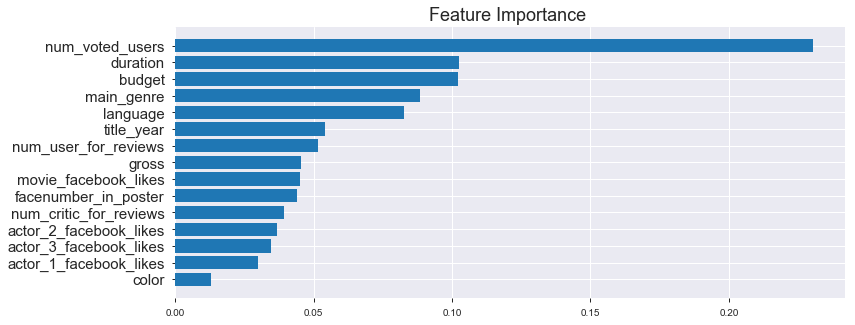

In [159]:
feature_importance = grid_search_xgb.best_estimator_.feature_importances_
sorted_importance = np.argsort(feature_importance)
pos = np.arange(len(sorted_importance))
plt.figure(figsize=(12,5))
plt.barh(pos, feature_importance[sorted_importance],align='center')
plt.yticks(pos, X_train_rfe.columns[sorted_importance],fontsize=15)
plt.title('Feature Importance ',fontsize=18)
plt.show()

After looking in to all the metrics almost we have seen that XGBRegressor with "{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 500}" these parameters has given the best results with mean squared error of 0.404. The Feature Importance given by this model is shown above.

<a id='bc'></a>

# 4. Building a Classification Model

In [160]:
datasetC.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,imdb_score,aspect_ratio,movie_facebook_likes,director_name_value_counts,actor_2_name_value_counts,main_genre,genres_value_counts,actor_1_name_value_counts,actor_3_name_value_counts,main_plot_keyword_value_counts
0,1,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,...,7.9,1.78,33000,7,3,0,12,4,3,2
1,1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,...,7.1,2.35,0,7,7,0,25,38,4,1
2,1,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,...,6.8,2.35,85000,8,2,0,45,4,1,7
3,1,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,...,8.5,2.35,164000,8,5,0,22,9,2,2
4,1,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,...,6.6,2.35,24000,3,3,0,46,2,1,69


To Build a classification Model I would like to reuse the preprocessed data from the Regression Model.
However I am going to replace the target variable and create a new target variable for our classification Model.

|imdb_score | Classify |
| --- | ---|
1-3 | Flop Movie
3-6 | Average Movie
6-10 | Hit Movie

In [161]:
y_train_classification = y_train.copy()

In [162]:
y_train_classification = pd.cut(y_train_classification, bins=[1, 3, 6, float('Inf')], labels=['Flop Movie', 'Average Movie', 'Hit Movie'])

In [163]:
y_test_classification = y_test.copy()

In [164]:
y_test_classification = pd.cut(y_test_classification, bins=[1, 3, 6, float('Inf')], labels=['Flop Movie', 'Average Movie', 'Hit Movie'])

We have created the target variable and now we will re use the independent variables form the Regression Model.

In [165]:
X_train_rfe_classification = X_train_rfe.copy()
X_test_rfe_classification = X_test_rfe.copy()

<a id='lr'></a>

## 4.1 Logistic Regression

Logistic Regresion is a linear algorithm does basically a binary classification. In order to use the Logistic Regression for Multiclass Classification we need to use the parameter solver as 'saga'. There are also other parameters for solver to do multiclass classification, I used saga as it also does L2 regularisation.

In [166]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(solver = 'saga', random_state = 0)
logit_model.fit(X_train_rfe_classification, y_train_classification)

C:\Users\bhgajula\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [167]:
y_logit_pred = logit_model.predict(X_test_rfe_classification)

In [168]:
y_logit_pred

array(['Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Average Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Average Movie', 'Average Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Average Movie', 'Hit Movie', 'Hit Movie', 'Average Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Average Movie',
       'Hit Movie', 'Hit Movie', 'Average Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movi

In [169]:
from sklearn import metrics
count_misclassified = (y_test_classification != y_logit_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test_classification, y_logit_pred)
print('Accuracy: {:.2f}'.format(accuracy))
precision = metrics.precision_score(y_test_classification, y_logit_pred, average= 'macro')
print('Precision: {:.2f}'.format(precision))
recall = metrics.recall_score(y_test_classification, y_logit_pred, average= 'macro')
print('Recall: {:.2f}'.format(recall))
f1_score = metrics.f1_score(y_test_classification, y_logit_pred, average = 'macro')
print('F1 score: {:.2f}'.format(f1_score))

Misclassified samples: 190
Accuracy: 0.75
Precision: 0.47
Recall: 0.40
F1 score: 0.41


C:\Users\bhgajula\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\bhgajula\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<a id='asvmc'></a>

## 4.2 Support Vector Classifier with Linear, Polynomial, RBF

Support Vector Classifier also basically does binary classification. In order to achieve the multi classification, we need to use the decision_function_shape as 'ovo'. The original one-vs-one (‘ovo’) decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2)

In [170]:
from sklearn.svm import SVC
svc_linear_model = SVC(kernel='linear', C=100, gamma= 'scale', decision_function_shape='ovo', random_state = 42)

In [171]:
svc_linear_model.fit(X_train_rfe_classification, y_train_classification)
y_svc_linear_pred = svc_linear_model.predict(X_test_rfe_classification)

In [172]:
y_svc_linear_pred

array(['Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Average Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Average Movie', 'Average Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Average Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Average Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Average Movie', 'Hit Movie', 'Hit Movie',
       'Average Movie', 'Hit Movie', 'Hit Movie', 'Average Movie',
       'Average Movie', 'Hit Movie', 'Hit Movie', 'Average Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie

In [173]:
from sklearn import metrics
count_misclassified = (y_test_classification != y_svc_linear_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test_classification, y_svc_linear_pred)
print('Accuracy: {:.2f}'.format(accuracy))
precision = metrics.precision_score(y_test_classification, y_svc_linear_pred, average= 'macro')
print('Precision: {:.2f}'.format(precision))
recall = metrics.recall_score(y_test_classification, y_svc_linear_pred, average= 'macro')
print('Recall: {:.2f}'.format(recall))
f1_score = metrics.f1_score(y_test_classification, y_svc_linear_pred, average = 'macro')
print('F1 score: {:.2f}'.format(f1_score))

Misclassified samples: 181
Accuracy: 0.76
Precision: 0.47
Recall: 0.45
F1 score: 0.46


C:\Users\bhgajula\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\bhgajula\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [174]:
from sklearn.svm import SVC
svc_poly_model = SVC(kernel='poly', C=100, gamma= 'scale', degree = 3, decision_function_shape='ovo', random_state = 42)

In [175]:
svc_poly_model.fit(X_train_rfe_classification, y_train_classification)
y_svc_poly_pred = svc_poly_model.predict(X_test_rfe_classification)

In [176]:
y_svc_poly_pred

array(['Hit Movie', 'Hit Movie', 'Hit Movie', 'Average Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Average Movie',
       'Hit Movie', 'Hit Movie', 'Average Movie', 'Hit Movie',
       'Average Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Average Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Average Movie', 'Average Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Average Movie', 'Average Movie', 'Hit Movie',
       'Average Movie', 'Hit Movie', 'Average Movie', 'Hit Movie',
       'Hit Movie', 'Average Movie', 'Average Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie'

In [177]:
from sklearn import metrics
count_misclassified = (y_test_classification != y_svc_poly_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test_classification, y_svc_poly_pred)
print('Accuracy: {:.2f}'.format(accuracy))
precision = metrics.precision_score(y_test_classification, y_svc_poly_pred, average= 'macro')
print('Precision: {:.2f}'.format(precision))
recall = metrics.recall_score(y_test_classification, y_svc_poly_pred, average= 'macro')
print('Recall: {:.2f}'.format(recall))
f1_score = metrics.f1_score(y_test_classification, y_svc_poly_pred, average = 'macro')
print('F1 score: {:.2f}'.format(f1_score))

Misclassified samples: 143
Accuracy: 0.81
Precision: 0.52
Recall: 0.50
F1 score: 0.51


C:\Users\bhgajula\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\bhgajula\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [178]:
from sklearn.svm import SVC
svc_rbf_model = SVC(kernel='rbf', C=100, gamma= 'scale', decision_function_shape='ovo', random_state = 42)

In [179]:
svc_rbf_model.fit(X_train_rfe_classification, y_train_classification)
y_svc_rbf_pred = svc_rbf_model.predict(X_test_rfe_classification)

In [180]:
y_svc_rbf_pred

array(['Hit Movie', 'Hit Movie', 'Hit Movie', 'Average Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Average Movie',
       'Hit Movie', 'Hit Movie', 'Average Movie', 'Hit Movie',
       'Average Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Average Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Average Movie', 'Average Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Average Movie', 'Hit Movie', 'Average Movie', 'Average Movie',
       'Hit Movie', 'Average Movie', 'Hit Movie', 'Average Movie',
       'Hit Movie', 'Hit Movie', 'Average Movie', 'Average Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       

In [181]:
from sklearn import metrics
count_misclassified = (y_test_classification != y_svc_rbf_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test_classification, y_svc_rbf_pred)
print('Accuracy: {:.2f}'.format(accuracy))
precision = metrics.precision_score(y_test_classification, y_svc_rbf_pred, average= 'macro')
print('Precision: {:.2f}'.format(precision))
recall = metrics.recall_score(y_test_classification, y_svc_rbf_pred, average= 'macro')
print('Recall: {:.2f}'.format(recall))
f1_score = metrics.f1_score(y_test_classification, y_svc_rbf_pred, average = 'macro')
print('F1 score: {:.2f}'.format(f1_score))

Misclassified samples: 146
Accuracy: 0.81
Precision: 0.51
Recall: 0.50
F1 score: 0.50


C:\Users\bhgajula\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\bhgajula\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<a id='emc'></a>

## 4.3 Ensemble Models

<a id='rfc'></a>

### 4.3.1 Random Forest Classifier with Hyper Parameter tuning 

In [182]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 500, 1000],
    'random_state' :[0]
}
# Create a based model
rf_model_classification = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf_model_classificaiton = GridSearchCV(estimator = rf_model_classification, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [183]:
grid_search_rf_model_classificaiton.fit(X_train_rfe_classification, y_train_classification)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [90, 100], 'max_features': [2, 3], 'min_samples_leaf': [3, 4], 'min_samples_split': [8, 10], 'n_estimators': [100, 500, 1000], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [184]:
y_rf_classification_pred = grid_search_rf_model_classificaiton.predict(X_test_rfe_classification)

In [185]:
y_rf_classification_pred

array(['Hit Movie', 'Hit Movie', 'Hit Movie', 'Average Movie',
       'Hit Movie', 'Hit Movie', 'Average Movie', 'Average Movie',
       'Hit Movie', 'Hit Movie', 'Average Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Average Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Average Movie',
       'Average Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Average Movie',
       'Hit Movie', 'Average Movie', 'Average Movie', 'Average Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Average Movie',
       'Hit Movie', 'Hit Movie', 'Average Movie', 'Average Movie',
       'Hit Movie', 'Hit Movie', 'Average Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
   

In [186]:
from sklearn import metrics
count_misclassified = (y_test_classification != y_rf_classification_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test_classification, y_rf_classification_pred)
print('Accuracy: {:.2f}'.format(accuracy))
precision = metrics.precision_score(y_test_classification, y_rf_classification_pred, average= 'macro')
print('Precision: {:.2f}'.format(precision))
recall = metrics.recall_score(y_test_classification, y_rf_classification_pred, average= 'macro')
print('Recall: {:.2f}'.format(recall))
f1_score = metrics.f1_score(y_test_classification, y_rf_classification_pred, average = 'macro')
print('F1 score: {:.2f}'.format(f1_score))

Misclassified samples: 130
Accuracy: 0.83
Precision: 0.54
Recall: 0.50
F1 score: 0.51


C:\Users\bhgajula\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\bhgajula\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<a id='gbc'></a>

### 4.3.2 Gradient Boost Classifier with Hyper Parameter Tuning 

In [187]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10, 50, 90],
    'max_features': [3],
    'min_samples_leaf': [3],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 500],
    'learning_rate' : [0.1, 0.2],
    'random_state' : [0]
}
# Create a based model
gbc_model_classification = GradientBoostingClassifier()
# Instantiate the grid search model
grid_search_gbc_model_classificaiton = GridSearchCV(estimator = gbc_model_classification, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [188]:
grid_search_gbc_model_classificaiton.fit(X_train_rfe_classification, y_train_classification)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [10, 50, 90], 'max_features': [3], 'min_samples_leaf': [3], 'min_samples_split': [8, 10], 'n_estimators': [100, 500], 'learning_rate': [0.1, 0.2], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [189]:
y_gbc_model_pred = grid_search_gbc_model_classificaiton.predict(X_test_rfe_classification)

In [190]:
y_gbc_model_pred

array(['Hit Movie', 'Hit Movie', 'Hit Movie', 'Average Movie',
       'Hit Movie', 'Hit Movie', 'Average Movie', 'Average Movie',
       'Average Movie', 'Hit Movie', 'Average Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Average Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Average Movie',
       'Average Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Average Movie',
       'Hit Movie', 'Average Movie', 'Average Movie', 'Average Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Average Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Average Movie', 'Hit Movie', 'Average Movie', 'Average Movie',
       'Average Movie', 'Hit Movie', 'Hit Movie', 'Average Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
    

In [191]:
from sklearn import metrics
count_misclassified = (y_test_classification != y_gbc_model_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test_classification, y_gbc_model_pred)
print('Accuracy: {:.2f}'.format(accuracy))
precision = metrics.precision_score(y_test_classification, y_gbc_model_pred, average= 'macro')
print('Precision: {:.2f}'.format(precision))
recall = metrics.recall_score(y_test_classification, y_gbc_model_pred, average= 'macro')
print('Recall: {:.2f}'.format(recall))
f1_score = metrics.f1_score(y_test_classification, y_gbc_model_pred, average = 'macro')
print('F1 score: {:.2f}'.format(f1_score))

Misclassified samples: 127
Accuracy: 0.83
Precision: 0.54
Recall: 0.51
F1 score: 0.52


C:\Users\bhgajula\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\bhgajula\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<a id='xgbc'></a>

## 4.4 XG Boost Classifier with Hyper Parameter Tuning 

In [192]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
     'objective' : ['multi:softmax', 'multi:softprob'],
     'n_estimators': [100, 500, 1000],
     'random_state': [0]
}
# Create a based model
xgb_model_classification = XGBClassifier()
# Instantiate the grid search model
grid_search_xgb_model_classificaiton = GridSearchCV(estimator = xgb_model_classification, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [193]:
grid_search_xgb_model_classificaiton.fit(X_train_rfe_classification, y_train_classification)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:   21.8s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   30.0s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'objective': ['multi:softmax', 'multi:softprob'], 'n_estimators': [100, 500, 1000], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [194]:
y_xgb_classification_pred = grid_search_xgb_model_classificaiton.predict(X_test_rfe_classification)

In [195]:
y_xgb_classification_pred

array(['Hit Movie', 'Hit Movie', 'Hit Movie', 'Average Movie',
       'Hit Movie', 'Hit Movie', 'Average Movie', 'Average Movie',
       'Hit Movie', 'Hit Movie', 'Average Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Average Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Average Movie',
       'Average Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Average Movie',
       'Hit Movie', 'Average Movie', 'Average Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Average Movie',
       'Hit Movie', 'Average Movie', 'Average Movie', 'Average Movie',
       'Hit Movie', 'Average Movie', 'Average Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Average Movie', 'Hit Movie',
       'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie', 'Hit Movie',
       '

In [196]:
from sklearn import metrics
count_misclassified = (y_test_classification != y_xgb_classification_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test_classification, y_xgb_classification_pred)
print('Accuracy: {:.2f}'.format(accuracy))
precision = metrics.precision_score(y_test_classification, y_xgb_classification_pred, average= 'macro')
print('Precision: {:.2f}'.format(precision))
recall = metrics.recall_score(y_test_classification, y_xgb_classification_pred, average= 'macro')
print('Recall: {:.2f}'.format(recall))
f1_score = metrics.f1_score(y_test_classification, y_xgb_classification_pred, average = 'macro')
print('F1 score: {:.2f}'.format(f1_score))

Misclassified samples: 139
Accuracy: 0.82
Precision: 0.52
Recall: 0.51
F1 score: 0.51


C:\Users\bhgajula\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\bhgajula\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


As we see that the Gradient Boost with Hyper Parameter seems to give us the best Results. This is because the nature of Ensemble models tend to being overfitted. However we consider the final model for our classification as Gradient Boosting Classifier.

<a id='ircm'></a>

# 4.5 Interpreting Results of Classfication Model

Considering Gradient Boosting classifier as the final model with 83 % accuracy

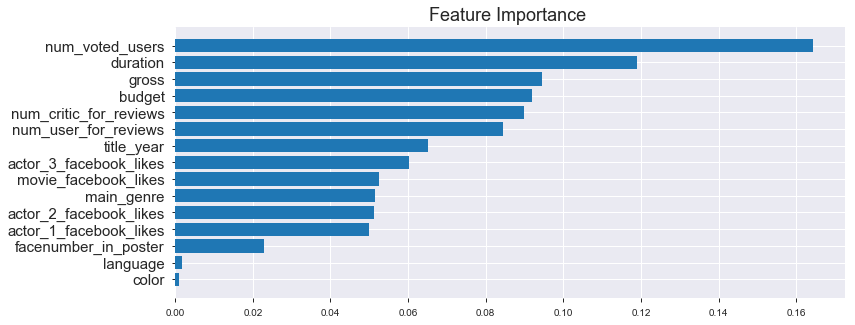

In [197]:
feature_importance = grid_search_gbc_model_classificaiton.best_estimator_.feature_importances_
sorted_importance = np.argsort(feature_importance)
pos = np.arange(len(sorted_importance))
plt.figure(figsize=(12,5))
plt.barh(pos, feature_importance[sorted_importance],align='center')
plt.yticks(pos, X_train_rfe.columns[sorted_importance],fontsize=15)
plt.title('Feature Importance ',fontsize=18)
plt.show()

<a id='conclusion'></a>

# 5. Conclusion

After Looking in to the feature importance of the best models in the Regression and Classification Model we see that both the models have given almost the same amount of importance to the respective features, considering XGBosot Regressor and Gradient Boost Classiifier. The results of all Regression and Classification Models are as follows:

|Regression Model|Mean_squared_error|
| --- | --- |
|Simple Linear Regression |0.70|
|SVRegressor Linear|0.72|
|SVRegressor Polynomial|0.93|
|SVRegressor RBF|0.68|
|Gradient Boost|0.43|
|Random Forest|0.45|
|XGBoost|0.40|

|Classification  Model|MisClassifications|Accuracy|Precision|Recall|F1-Score|
| --- | --- | --- | --- | --- | --- |
| Logistic Regression | 190 | 0.75 | 0.47 | 0.40 | 0.41 |
| SVC Linear | 181 | 0.76 | 0.47 | 0.45 | 0.46 |
| SVC Polynomial | 143 | 0.81 | 0.52 | 0.50 | 0.51 |
| SVC RBF | 146 | 0.81 | 0.51 | 0.50 | 0.50 |
| Random Forest | 130 | 0.83 | 0.54 | 0.50 | 0.51 |
| Gradient Boosting | 127 | 0.83 | 0.54 | 0.51 | 0.52 |
| XGBoost | 139 | 0.82 | 0.52 | 0.51 | 0.51 |
